In [28]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [5]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [11]:
gnb = GaussianNB()

In [13]:
gnb.fit(X_train, Y_train)
gnb_pred = gnb.predict(X_test)
print('Accuracy of Naive Bayes: ', accuracy_score(Y_test, gnb_pred))

Accuracy of Naive Bayes:  0.9666666666666667


In [19]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, Y_train)
dt_pred = dt.predict(X_test)
print('Accuracy of Decision Tree: ', accuracy_score(Y_test, dt_pred))

Accuracy of Naive Bayes:  0.9666666666666667


In [49]:
svm_cl = svm.SVC(kernel='linear')
svm_cl.fit(X_train, Y_train)
svm_pred = svm_cl.predict(X_test)
print('Accuracy of SVM: ', accuracy_score(Y_test, svm_pred))

Accuracy of SVM:  1.0


In [51]:
import matplotlib.pyplot

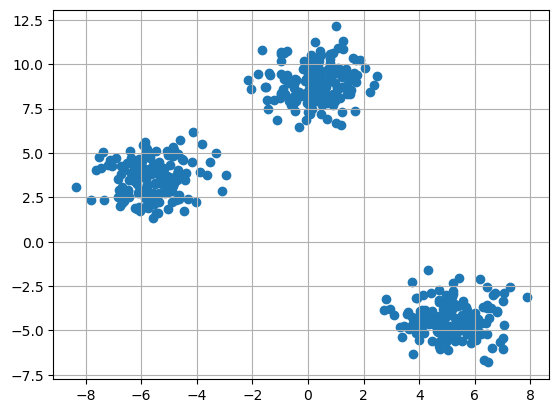

In [53]:
X, Y = datasets.make_blobs(n_samples=500, n_features=2, centers=3, random_state=23)
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [57]:
k = 3
clusters = {}
np.random.seed(23)
for idx in range(k):
    center = 2*(2*np.random.random(X.shape[1],) -1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }
    clusters[idx] = cluster
clusters

{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

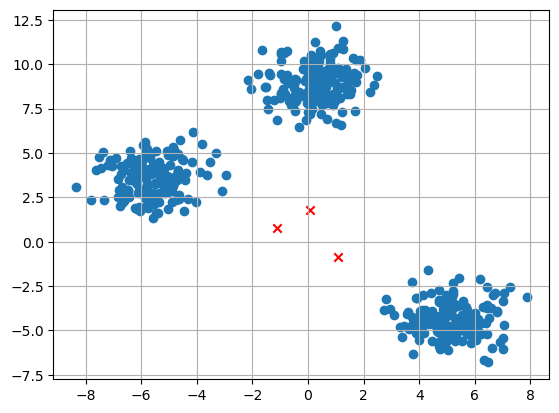

In [61]:
plt.scatter(X[:,0], X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0], center[1], marker='x', c='red')
plt.show()

In [63]:
def distance(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [91]:
def assign_cluster(X, clusters):
    for idx in range(X.shape[0]):
        dist = []
        curr_x = X[idx]
        for i in range(k):
            dis = distance(curr_x, clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

In [93]:
def  update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis=0)
            clusters[i]['center'] = new_center
            clusters[i]['points'] = []
    return clusters

In [95]:
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i], clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

In [97]:
clusters = assign_cluster(X, clusters)
clusters = update_clusters(X, clusters)
pred = pred_cluster(X, clusters)

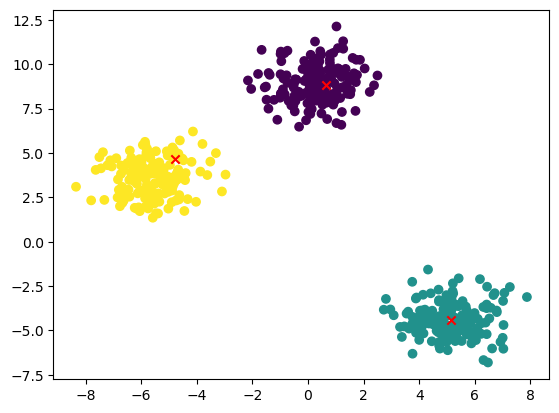

In [99]:
plt.scatter(X[:,0], X[:,1], c=pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0], center[1], marker='x', c='red')
plt.show()